# Correlation and Least Squares Regression.
```
- In this lecture and series of exercises you will learn:
    - The concepts of variance and covariance of data.
    - What the correlation coefficient is and how it relates to covariance.
    - How linear regression relates to correlation.
    - How to transform data with nonlinear relationship so that they may be analyzed with linear regression.
    - The extension of linear regression to multiple dimensions.
    - Application of the t-test to determine the significance of predictors in a multidimensional linear model.
```
#### What is your ability after finish this lecture.

 - Calculate the correlation coefficient for a 2D data set.
 - Find the least squares solution for a multi-variate linear regression problem.
 - Apply linear regression to nonlinear relationships through **variable transforms** .
 - Perform model selection on the predictors using a t-test.

# Bofre start you need to install the following packages.

```

As part of this lecture, you will be applying all of the above concepts to analyze real data in the context of astronomy. To do this, you will need a data analysis environment set up.

We recommend using Python, with the numpy and scipy packages. The data and solutions will be given in Python using these libraries. However, you are welcome to use any programming language or environment that you wish.

You will also be asked to visualize the data. In Python, you can do this with the matplotlib library.

For example, a scatter plot can be creating using
```py
import matplotlib.pyplot as plt # import the library
plt.scatter(Xs, Ys) # Create the scatter plot, Xs and Ys are two numpy arrays of the same length
plt.show() # Display the plot you just created.
# A line plot can be created using

plt.plot(Xs, Ys)
# This will draw a line through the X, Y pairs defined by the Xs and Ys numpy arrays.

# When working with matrices, numpy provides some convenient facilities. For example, to find the inverse of a matrix, use

import numpy as np
np.linalg.inv(matrix_to_invert)
# The scipy package provides statistical distributions. For example, to calculate p-values for the t-distribution, you can use the survival function (sf):

import scipy.stats
scipy.stats.t.sf(T, num_degrees_of_freedom)
```

## Correlation. --> `part 2`

- what we nee to learn on this unit?
    - Build up the concept of correlations from the more basic concepts of variance and covariance of data.
    - Apply the concept of correlation to data from astronomy.

- what is Covariance(التغاير)?
  - Covariance is a measure of the amount of correlation between two variables.
  - Conariance Eqution:
    - $Cov(X,Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \overline X)(Y_i - \overline Y)$
    - $ \overline X = \frac{1}{n} \sum_{i=1}^{n} X_i $  -> `mean of X`
    - $ \overline Y = \frac{1}{n} \sum_{i=1}^{n} Y_i $  -> `mean of Y`
    - X_i is the ith value of X.
    - Y_i is the ith value of Y.
    - n is the number of values in X and Y.
    - $Cov(X,Y)$ is the covariance of X and Y.

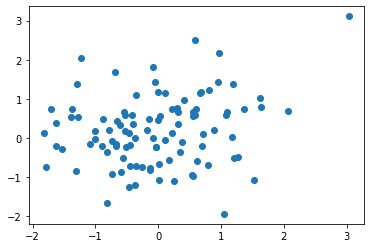

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Create the data
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)


# Calculate the covariance
Cov = np.cov(X, Y)[0, 1]


# Calculate the correlation coefficient
Corr = Cov / (np.std(X) * np.std(Y))


# Plot the data
plt.scatter(X, Y)
plt.show()

### Some Point about Covariance.
- if the mean value  of $\overline X = sum_{i=1}^{n} X_i / n$ and $\overline Y = sum_{i=1}^{n} Y_i / n$, to cheange thats we will applying the `Bessel's correction`. 

    - $Cov(X,Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \overline X)(Y_i - \overline Y)$.

---
- What does covariance demonstrate?
    - Covariance measures the direction of the relationship between two variables. A positive covariance means that both variables tend to be high or low at the same time. A negative covariance means that when one variable is high, the other tends to be low.
--- 
- What is covariance and variance?
    - Variance and covariance are mathematical terms frequently used in statistics and probability theory. Variance refers to the spread of a data set around its mean value, while a covariance refers to the measure of the directional relationship between two random variables.
---
- How do you interpret covariance in statistics?
    
    ![covarinance](./assets/img/covariance.png)

___

```text
In this exercise, we will investigate the correlation present in astronomical data observed by Edwin Hubble in the period surrounding 1930.

Hubble was interested in the motion of distant galaxies. He recorded the apparent velocity of these galaxies – the speed at which they appear to be receding away from us – by observing the spectrum of light they emit, and the distortion thereof caused by their relative motion to us. He also determined the distance of these galaxies from our own by observing a certain kind of star known as a Cepheid variable which periodically pulses. The amount of light this kind of star emits is related to this pulsation, and so the distance to any star of this type can be determined by how bright or dim it appears.

The following figure shows his data. The Y-axis is the apparent velocity, measured in kilometers per second. Positive velocities are galaxies moving away from us, negative velocities are galaxies that are moving towards us. The Y-axis is the distance of the galaxy from us, measured in mega-parsecs (Mpc); one parsec is 3.26 light-years, or 30.9 trillion kilometers
```

![Hubble data](./assets/img/images_hubble_regression.png)

```

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [5]:
# Hubble Dataset

Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = 24

#### Mean for dataset.

- why we need to calculate the mean of the dataset?
    - to calculate the covariance.
    - to calculate the correlation coefficient.

In [6]:
# mean for Xs and Ys
mu_X = np.mean(Xs)  #Or Xs.sum()/N
mu_Y = np.mean(Ys)  #Or Ys.sum()/N
print("mu_X = ", mu_X)
print("mu_Y = ", mu_Y)

mu_X =  0.9199250000000001
mu_Y =  425.6175


#### Standard deviation for dataset.

- why we need to calculate the standard deviation of the dataset?
    - to calculate the correlation coefficient.
- how many equations we need to calculate the standard deviation of the dataset?
    - 2 equations.
- what is two equations?
    - $ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \overline X)^2} $
    - $ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \overline Y)^2} $


In [7]:
# standard deviation for Xs and Ys
sigma_X = np.sqrt(np.sum((Xs - mu_X)**2)/(N-1))
sigma_Y = np.sqrt(np.sum((Ys - mu_Y)**2)/(N-1))
print("sigma_X = ", sigma_X)
print("sigma_Y = ", sigma_Y)

sigma_X =  0.6533948258734996
sigma_Y =  348.7336574977229


#### let us now calculate the convariance of the dataset.

we will use this equation:

$ Cov(X,Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \overline X)(Y_i - \overline Y)$

- $\sum_{i=1}^{n}(X_i - \overline X)$.
- $\sum_{i=1}^{n}(Y_i - \overline Y)$.
- $n$ is the number of values in X and Y.
- $n-1$ is the number of values in X and Y minus 1.
- $X_i$ is the ith value of X.
- $Y_i$ is the ith value of Y.
- $\overline X$ is the mean of X.
- $\overline Y$ is the mean of Y.

In [8]:
# Now, calculate the sample covariance for the Hubble dataset to three significant figures:
covariance = ((Xs - mu_X) * (Ys - mu_Y)).sum() / (N - 1)
print("covariance =", covariance)


covariance = 191.20706528260868


## The Correlation Coefficient --> `part 3`

- what is differnt between correlation coefficient and covariance?
    - correlation coefficient is a measure of the strength of the linear relationship between two variables.
    - covariance is a measure of the amount of correlation between two variables.
- if X and Y are positively correlated, the correlation coefficient is positive.
- if X and Y are negatively correlated, the correlation coefficient is negative.
- if X and Y are independent, the correlation coefficient is zero.
- if X and Y are correlation coefficient is zero when X and Y are uncorrelated(remember that this dose mean that the two variables are independent).
- Correlation don't take any units.
    - exmaple on Hubble dataset correlation coefficient is 0.9 with out unit.

In [9]:
# Calculate the correlation coefficient
Corr = covariance / (sigma_X * sigma_Y)
print("Corr =", Corr)

Corr = 0.8391399162310663


### Quadratics.

- Quadratics vs Linear vs Exponential.
    - Quadratics are the simplest form of regression.
    - Linear regression is the simplest form of regression.
    - Exponential regression is the simplest form of regression.

    ![Grap](./assets/img/linear-quadratic-exponential.jpg)


- what is a quadratic?
    - a quadratic is a function of the form $f(x) = ax^2 + bx + c$.
        - $f(x)$ is the function.
        - $a$ is the coefficient of the quadratic.
            - $a = \frac{1}{2} \sum_{i=1}^{n} (x_i - \overline X)^2$
        - $b$ is the coefficient of the linear term.
            - $b = \frac{1}{n} \sum_{i=1}^{n} (x_i - \overline X)$
        - $c$ is the constant term.
            - $c = \overline Y - \overline X$
- what is the quadratic formula?
    - the quadratic formula is a way of finding the roots of a quadratic equation.
    - the quadratic formula is $x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$
    - $b^2 - 4ac$ is the discriminant.
    - $b$ is the coefficient of the linear term.
    - $a$ is the coefficient of the quadratic term.
    - $c$ is the constant term.
___
- Quadratic relation between X and Y.
    - $y = a x^2 + b x + c$
    - $a = \frac{1}{2} \sum_{i=1}^{n} (x_i - \overline X)^2$
    - $b = \frac{1}{n} \sum_{i=1}^{n} (x_i - \overline X)$
    - $c = \overline Y - \overline X$
- suppose $Y =X^2$. what is the correlation between random variables X and Y ?

```text
A may seems very tempting. "Correlation only measures variables' relations up to linear relations" is conceptually correct, but we need to be careful with what it actually means. A seemingly purely nonlinear relation can have "linear parts", depending on how X is distributed. Let's first see two examples.
```
Exmaple One:

$ X= 0$ with probability 0.5 and $X = 2$ otherwise.

step 1:
Than $Cov(X,Y) = E(XY) - E(X)E(Y) = 4 - (1 * 2) = 2$

step2: 
$Correlation(X,Y) = Cov(X,Y) / (std(X) * std(Y)) = 2 / (1 * 2) = 1$
Or 
$Correlation(X,Y) = Cov(X,Y) / \sqrt{Var(X) Var(Y)} = 2 / \sqrt{1 * 2} = 1$

```

```
___


In [10]:
import math

def equationroots( a, b, c): 
  
    # calculating discriminant using formula
    dis = b * b - 4 * a * c 
    sqrt_val = math.sqrt(abs(dis)) 
      
    # checking condition for discriminant
    if dis > 0: 
        print(" real and different roots ") 
        print((-b + sqrt_val)/(2 * a)) 
        print((-b - sqrt_val)/(2 * a)) 
      
    elif dis == 0: 
        print(" real and same roots") 
        print(-b / (2 * a)) 
      
    # when discriminant is less than 0
    else:
        print("Complex Roots") 
        print(- b / (2 * a), " + i", sqrt_val) 
        print(- b / (2 * a), " - i", sqrt_val) 
  
# Driver Program 
a = 1
b = 10
c = -24
  
# If a is 0, then incorrect equation
if a == 0: 
        print("Input correct quadratic equation") 
  
else:
    equationroots(a, b, c)

 real and different roots 
2.0
-12.0


______

## Regression `part 4`



## How to construct a linear predictive model `Part 4`
- simple linear regression equation:
    - $y = \beta_0 + \beta_1 x$.
        - $y$ is the dependent variable.
        - $x$ is the independent variable.
        - $\beta_0$ is the intercept.
        - $\beta_1$ is the slope.
    - slop equation:
        - $\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$.
    - intercept equation:
        - $\beta_0 = \bar{y} - \beta_1 \bar{x}$.

### Goodness fit metric  (R-squared)
is a measure of how well a regression model fits the data.

$R^2$ = 1- $\frac{SS_{res}}{SS_{tot}}$

- $R^2$ is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. the independent variable.

- $SS_{res}$ is the sum of the squared residuals.
    - $SS_{res} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
        -   $y_i$ is the actual value of the dependent variable.
        -   $\hat{y}_i$ is the predicted value of the dependent variable.

- $SS_{tot}$ is the sum of the squared total.
    - $SS_{tot} = \sum_{i=1}^{n} (y_i - \overline{y})^2$
        - $\overline{y}$ is the mean of the dependent variable.
        - $y_i$ is the actual value of the dependent variable.

#### What does R-squared tell us in regression?
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.

#### Is a higher R-squared better?
In general, the higher the R-squared, the better the model fits your data.

#### when use R-squared to evaluate a model?
R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. After fitting a linear regression model, you need to determine how well the model fits the data.






In [11]:
# goodness of fit metric (R-squared)
def r_squared(xs, ys):
    mean = np.mean(ys)
    ss_tot = sum((ys - mean) ** 2)
    ss_res = sum((ys - xs) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

In [12]:
# line reqgression model for the Hubble dataset
def line_regression(xs, ys):
    slope = covariance / (sigma_X * sigma_Y)
    intercept = mu_Y - slope * mu_X
    return slope, intercept

In [13]:
slope , intercept = line_regression(Xs, Ys)
print("slope =", slope)
print("intercept =", intercept)

slope = 0.8391399162310663
intercept = 424.8455542125611


In [14]:
# use some hubble data to test the line regression model
Xs_test = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])
Ys_test = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

In [15]:
# predict the Hubble data using the line regression model
Ys_pred = intercept + slope * Xs_test
print("Ys_pred =", Ys_pred)

Ys_pred = [424.87400106 424.88104983 425.02429101 425.06121317 425.07463941
 425.07463941 425.22316717 425.26764159 425.26764159 425.38008634
 425.52106185 425.6041367  425.6041367  425.60917154 425.60917154
 425.70147693 425.77699952 425.77699952 426.02874149 426.28887487
 426.54900824 426.54061684 426.54061684 426.54061684]


In [16]:
sum_of_squared_residuals = sum((Ys_test - Ys_pred) ** 2)
print("sum_of_squared_residuals =", sum_of_squared_residuals)

sum_of_squared_residuals = 2789775.007231944


In [17]:
sum_of_squared_total = sum((Ys_test - np.mean(Ys_test)) ** 2)
print("sum_of_squared_total =", sum_of_squared_total)

sum_of_squared_total = 2797148.76905


In [18]:
r2 = 1 - (sum_of_squared_residuals / sum_of_squared_total)
print("r2 =", r2)

r2 = 0.0026361707677637902


___
##  Correcting simple nonlinear relationships `Part 5`

### Understanding Linear Relationships.
A linear relationship exists when two quantities are proportional to each other. If you increase one of the quantities, the other quantity either increases or decreases at a constant rate. For example, if you get paid $10 an hour, there is a linear relationship between your hours worked and your pay. Working another hour always results in a $10 pay increase, regardless of how many hours you already worked.

nonlinear relationships are monotonic, meaning they always increase or decrease, but not both. Monotonic relationships differ from linear relationships because they do not increase or decrease at a constant rate. When graphed, they appear as curves. If a monotonic relationship occurs where increases in one entity cause a decrease in the other entity, this is called an inverse relationship. However, nonlinear relationships can also be too irregular to fit any of these categories.

### Understanding Nonlinear Relationships
Nonlinear relationships, and often monotonic relationships, arise regularly when comparing geometrical measurements of a single shape. For example, there is a monotonic nonlinear relationship between the radius of a sphere and the volume of that same sphere. Nonlinear relationships also appear in real world situations, such as in the relationship between the value of a motorcycle and the amount of time you owned the motorcycle, or in the amount of time it takes to do a job in relation to the number of people there to help. If your boss raises your hourly rate to $15 per hour when you work overtime, the relationship of your hours worked to your pay acquired might become nonlinear.

### 5 Examples of Nonlinear Relationships Between Variables.
[link](https://www.statology.org/nonlinear-relationship-examples/)
___
#### Example 1: Quadratic Relationships
One of the most common nonlinear relationships in the real world is a quadratic relationship between variables.

When plotted on a scatterplot, this relationship typically exhibits a “U” shape.

One example might be total working hours per week vs. overall happiness:

![Exmaple1](./assets/img/nonlinear-exmaple1.jpg)

As working hours increase from zero, overall happiness tends to increase, but beyond a certain threshold more working hours actually leads to decreased happiness.

This upside down “U” shape is the signature shape of a quadratic relationship between two variables.
___

#### Example 3: Exponential Relationships

Another common nonlinear relationship in the real world is a cubic relationship between variables.

When plotted on a scatterplot, this relationship typically has two distinct curves.

This type of relationship exists often between variables in the field of thermodynamics:

![exmapl2](./assets/img/nonlinear2.jpg)

During the first few years of growth, a bamboo plant grows very slowly but once it reaches a certain age it explodes in height and grows at a rapid pace.
___

#### Example 4: Logarithmic Relationships
Another common nonlinear relationship in the real world is a logarithmic relationship between variables.

When plotted on a scatterplot, this relationship exhibits a single curve that becomes less pronounced as the variable on the x-axis increases.

One example of a logarithmic relationship is between the efficiency of smart-home technologies and time:
![exmaple3](./assets/img/nonlinear3.jpg)

When a new smart-home technology (like a self-operating vacuum or self-operating AC unit) is installed in a home, it learns rapidly how to become more efficient, but then once it reaches a certain point it hits a maximum threshold in efficiency.

___

In [19]:
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

In [22]:
# log(YS)= k*log(XS) + log(w)
k = (np.log(Ys) - np.log(Xs)).sum() / (np.log(Xs) ** 2).sum()
w = np.exp(np.log(Ys).sum() - k * np.log(Xs).sum())
Y = k * np.log(Xs) + np.log(w)

print("k =", k)
print("w =", w)
print("Y =", Y)

k = 0.1529117929472797
w = 45465357.95424496
Y = [17.48729739 17.58286489 17.63246123 17.69648698 17.88456058 17.97735278
 18.08430186 18.15305328 18.19461096]
